In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
d0=pd.read_csv("/Users/namanmuktha/Desktop/mediksearch/Tel & Ap Data/medicine_parsed-2.csv")
d1=pd.read_csv("/Users/namanmuktha/Desktop/mediksearch/Tel & Ap Data/p2.csv")
d2=pd.read_csv("/Users/namanmuktha/Desktop/mediksearch/Tel & Ap Data/p3.csv")
d3=pd.read_csv("/Users/namanmuktha/Desktop/mediksearch/Tel & Ap Data/p4.csv")
d0['EWS']=d0['EWS'].fillna(value="NO")

In [4]:
d0.head()


,COLLEGE,RANK,LOC,CAT,SX,EWS,PHASE
0,"OSMANIA MEDICAL COLLEGE, HYDERABAD",2043,OU,OC,M,NO,P1
1,"OSMANIA MEDICAL COLLEGE, HYDERABAD",3339,AU,OC,F,NO,P1
2,"OSMANIA MEDICAL COLLEGE, HYDERABAD",3701,AU,OC,M,NO,P1
3,"OSMANIA MEDICAL COLLEGE, HYDERABAD",4098,SVU,OC,F,NO,P1
4,"OSMANIA MEDICAL COLLEGE, HYDERABAD",4127,SVU,OC,M,NO,P1


In [5]:
d1.head()

,COLLEGE,RANK,LOC,CAT,SX,EWS,PHASE
0,"OSMANIA MEDICAL COLLEGE, HYDERABAD",4098,SVU,OC,F,NO,P1
1,"OSMANIA MEDICAL COLLEGE, HYDERABAD",4259,AU,OC,M,NO,P1
2,"OSMANIA MEDICAL COLLEGE, HYDERABAD",4460,AU,OC,M,NO,P2
3,"OSMANIA MEDICAL COLLEGE, HYDERABAD",4760,NL,OC,M,NO,P2
4,"OSMANIA MEDICAL COLLEGE, HYDERABAD",4995,SVU,OC,F,NO,P1


In [6]:
d2.head()

,COLLEGE,RANK,LOC,CAT,SX,EWS,PHASE
0,"OSMANIA MEDICAL COLLEGE, HYDERABAD",4098,SVU,OC,F,NO,P1
1,"OSMANIA MEDICAL COLLEGE, HYDERABAD",4259,AU,OC,M,NO,P1
2,"OSMANIA MEDICAL COLLEGE, HYDERABAD",4460,AU,OC,M,NO,P2
3,"OSMANIA MEDICAL COLLEGE, HYDERABAD",5521,AU,OC,F,NO,P2
4,"OSMANIA MEDICAL COLLEGE, HYDERABAD",5574,OU,BCE,M,NO,P1


In [7]:
d3.head()

,COLLEGE,RANK,LOC,CAT,SX,EWS,PHASE
0,APOLLO INSTITUTE OF MEDICAL SCIENCES AND RESEA...,32375,NL,OC,F,NO,P1
1,APOLLO INSTITUTE OF MEDICAL SCIENCES AND RESEA...,34091,NL,OC,M,NO,P2
2,APOLLO INSTITUTE OF MEDICAL SCIENCES AND RESEA...,63027,OU,OC,M,NO,P1
3,APOLLO INSTITUTE OF MEDICAL SCIENCES AND RESEA...,65907,OU,OC,F,NO,P1
4,APOLLO INSTITUTE OF MEDICAL SCIENCES AND RESEA...,79356,OU,BCD,M,NO,P1


In [8]:
d0["PHASE"].unique()

array(['P1'], dtype=object)

In [9]:
d1["PHASE"].unique()

array(['P1', 'P2'], dtype=object)

In [10]:
d2["PHASE"].unique()

array(['P1', 'P2', 'P3'], dtype=object)

In [11]:
d3["PHASE"].unique()

array(['P1', 'P2', 'P4', 'P5', 'P3'], dtype=object)

In [12]:
df=pd.concat([d0,d1,d2,d3],ignore_index=True)

In [13]:
df.head()

,COLLEGE,RANK,LOC,CAT,SX,EWS,PHASE
0,"OSMANIA MEDICAL COLLEGE, HYDERABAD",2043,OU,OC,M,NO,P1
1,"OSMANIA MEDICAL COLLEGE, HYDERABAD",3339,AU,OC,F,NO,P1
2,"OSMANIA MEDICAL COLLEGE, HYDERABAD",3701,AU,OC,M,NO,P1
3,"OSMANIA MEDICAL COLLEGE, HYDERABAD",4098,SVU,OC,F,NO,P1
4,"OSMANIA MEDICAL COLLEGE, HYDERABAD",4127,SVU,OC,M,NO,P1


In [14]:
df.shape

(17694, 7)

In [15]:
df.isna().sum()

COLLEGE    0
RANK       0
LOC        0
CAT        0
SX         0
EWS        0
PHASE      0
dtype: int64

In [16]:
df.shape

(17694, 7)

<Axes: xlabel='COLLEGE', ylabel='count'>

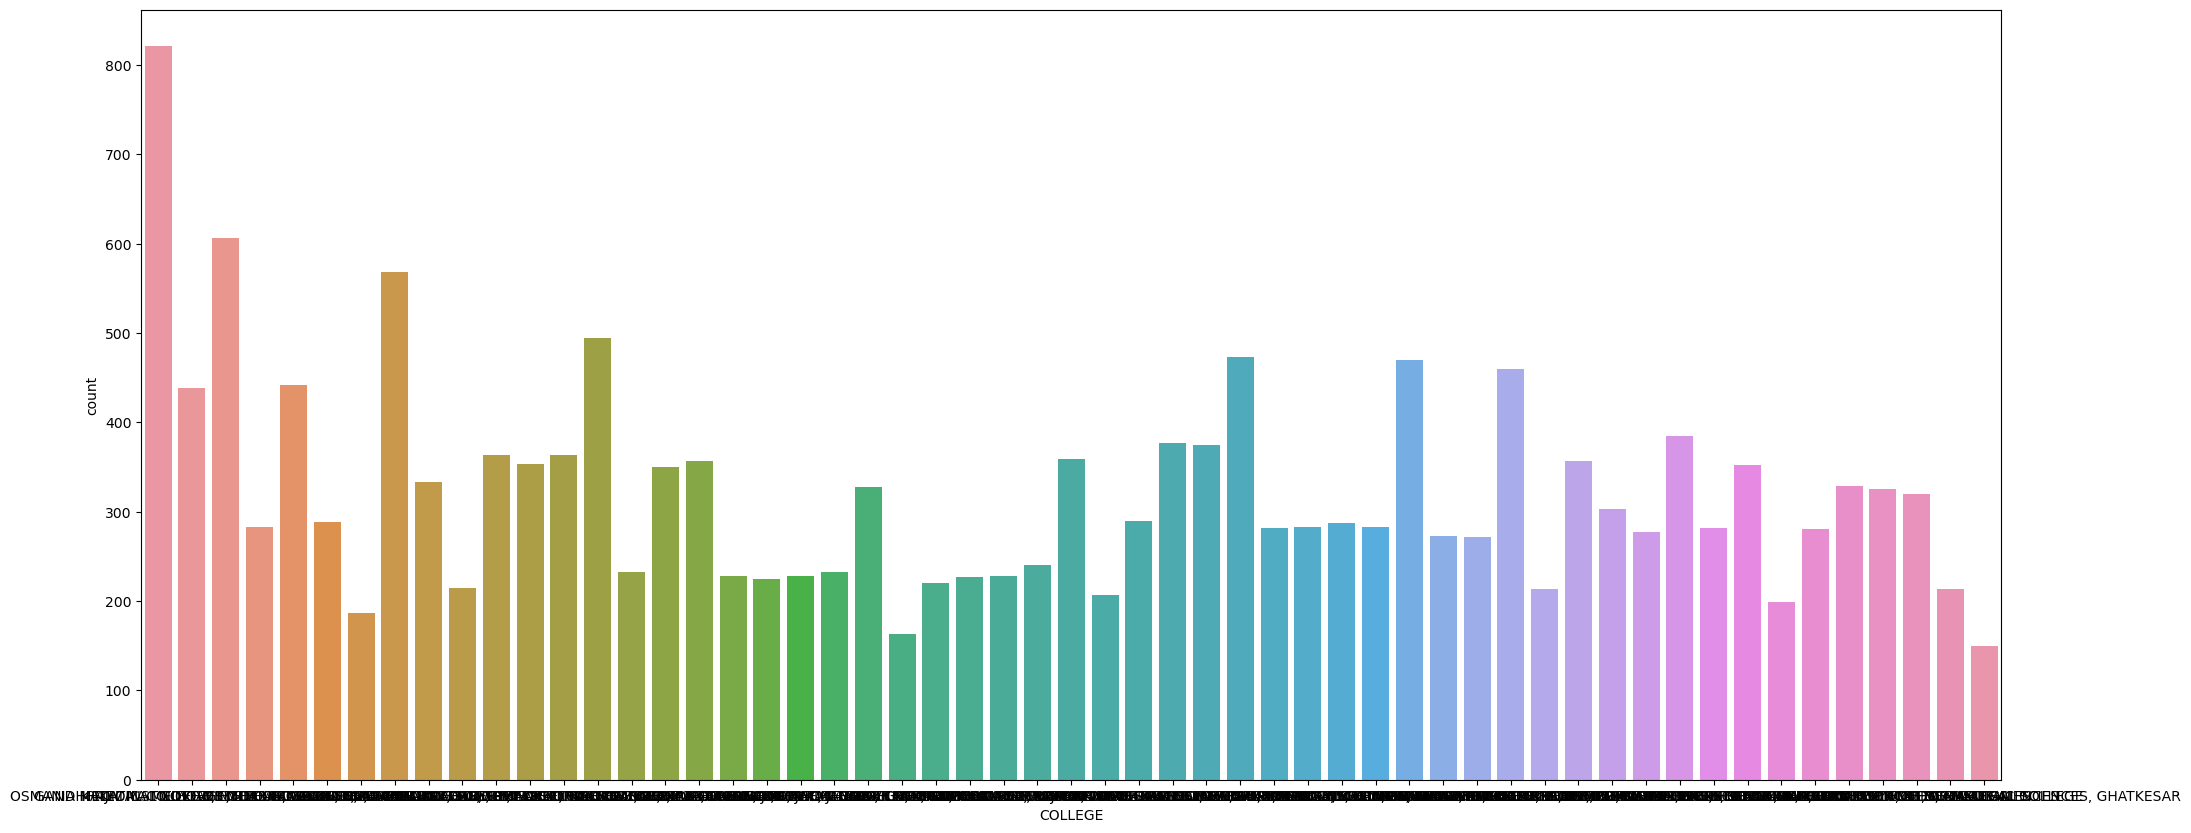

In [17]:
plt.figure(figsize=(24,10))
sns.countplot(data=df,x="COLLEGE")

In [18]:
df.dtypes

COLLEGE    object
RANK        int64
LOC        object
CAT        object
SX         object
EWS        object
PHASE      object
dtype: object

In [19]:
df.nunique()

COLLEGE      55
RANK       8181
LOC           4
CAT           8
SX            2
EWS           2
PHASE         5
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['COLLEGE']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['COLLEGE'] = encoded_values

In [21]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['SX']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping1 = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['SX'] = encoded_values

In [22]:
one_hot_encoded = pd.get_dummies(df['CAT'], prefix='CAT')

# Drop the original 'CAT' column from the DataFrame
df = df.drop('CAT', axis=1)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)


In [23]:

from sklearn.preprocessing import LabelEncoder
disorder_column = df['LOC']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping_loc = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['LOC'] = encoded_values

In [24]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['PHASE']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping_phase = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['PHASE'] = encoded_values

In [25]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['EWS']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping_phase = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['EWS'] = encoded_values

In [26]:
df.head()

,COLLEGE,RANK,LOC,SX,EWS,PHASE,CAT_BCA,CAT_BCB,CAT_BCC,CAT_BCD,CAT_BCE,CAT_OC,CAT_SC,CAT_ST
0,45,2043,2,1,1,0,False,False,False,False,False,True,False,False
1,45,3339,0,0,1,0,False,False,False,False,False,True,False,False
2,45,3701,0,1,1,0,False,False,False,False,False,True,False,False
3,45,4098,3,0,1,0,False,False,False,False,False,True,False,False
4,45,4127,3,1,1,0,False,False,False,False,False,True,False,False


In [27]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=75, encode='ordinal', strategy='uniform')

# Fit and transform the continuous column
df['discrete_column'] = discretizer.fit_transform(df[['RANK']])

# Print the DataFrame with the discretized column
print(df)

       COLLEGE    RANK  LOC  SX  EWS  PHASE  CAT_BCA  CAT_BCB  CAT_BCC  \
0           45    2043    2   1    1      0    False    False    False   
1           45    3339    0   0    1      0    False    False    False   
2           45    3701    0   1    1      0    False    False    False   
3           45    4098    3   0    1      0    False    False    False   
4           45    4127    3   1    1      0    False    False    False   
...        ...     ...  ...  ..  ...    ...      ...      ...      ...   
17689        8  766682    3   0    1      4    False    False    False   
17690        8  852801    1   0    1      4    False    False    False   
17691        8  886463    2   0    1      2    False    False    False   
17692        8  971542    2   0    1      1    False    False    False   
17693        8  985384    0   0    1      0    False    False    False   

       CAT_BCD  CAT_BCE  CAT_OC  CAT_SC  CAT_ST  discrete_column  
0        False    False    True   False   Fa

/Users/namanmuktha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [28]:
df.head()

,COLLEGE,RANK,LOC,SX,EWS,PHASE,CAT_BCA,CAT_BCB,CAT_BCC,CAT_BCD,CAT_BCE,CAT_OC,CAT_SC,CAT_ST,discrete_column
0,45,2043,2,1,1,0,False,False,False,False,False,True,False,False,0.0
1,45,3339,0,0,1,0,False,False,False,False,False,True,False,False,0.0
2,45,3701,0,1,1,0,False,False,False,False,False,True,False,False,0.0
3,45,4098,3,0,1,0,False,False,False,False,False,True,False,False,0.0
4,45,4127,3,1,1,0,False,False,False,False,False,True,False,False,0.0


In [29]:
df.nunique()

COLLEGE              55
RANK               8181
LOC                   4
SX                    2
EWS                   2
PHASE                 5
CAT_BCA               2
CAT_BCB               2
CAT_BCC               2
CAT_BCD               2
CAT_BCE               2
CAT_OC                2
CAT_SC                2
CAT_ST                2
discrete_column      75
dtype: int64

<Axes: xlabel='COLLEGE', ylabel='count'>

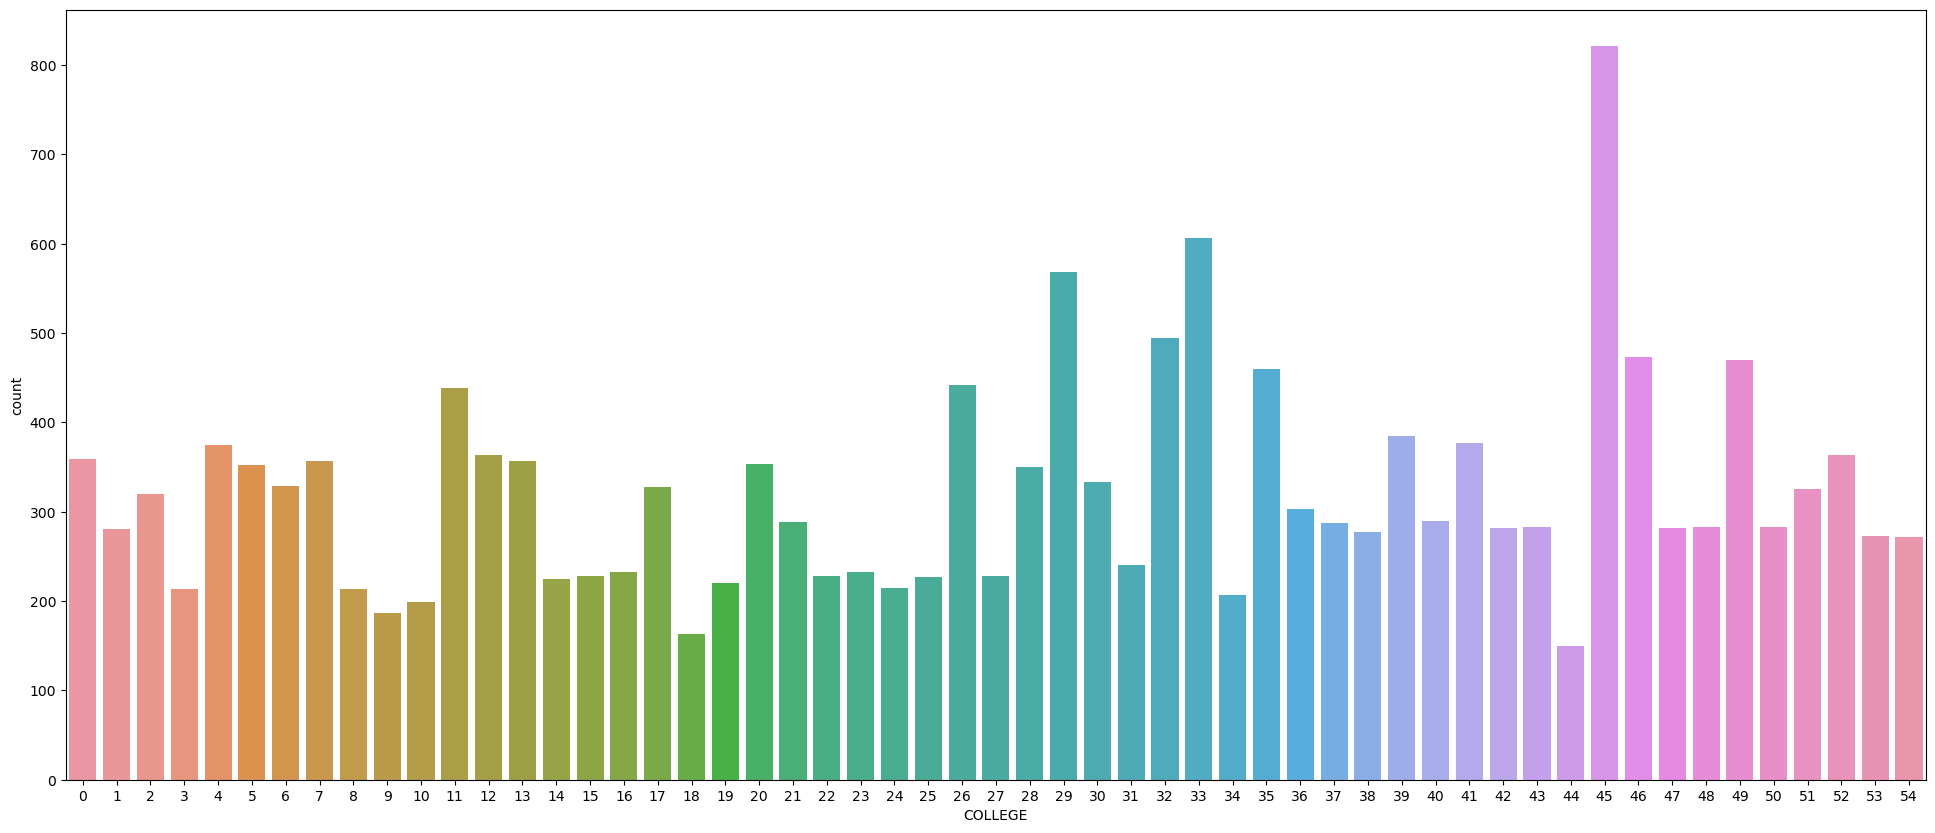

In [30]:
plt.figure(figsize=(24,10))
sns.countplot(data=df,x="COLLEGE")

In [31]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=420)

In [32]:
X=df.drop(['COLLEGE'],axis=1)
y=df['COLLEGE']

In [33]:
X_resampled, y_resampled = oversampler.fit_resample(X,y)

In [34]:
df_updated=X_resampled

In [35]:
df_updated['COLLEGE']=y_resampled

<Axes: xlabel='COLLEGE', ylabel='count'>

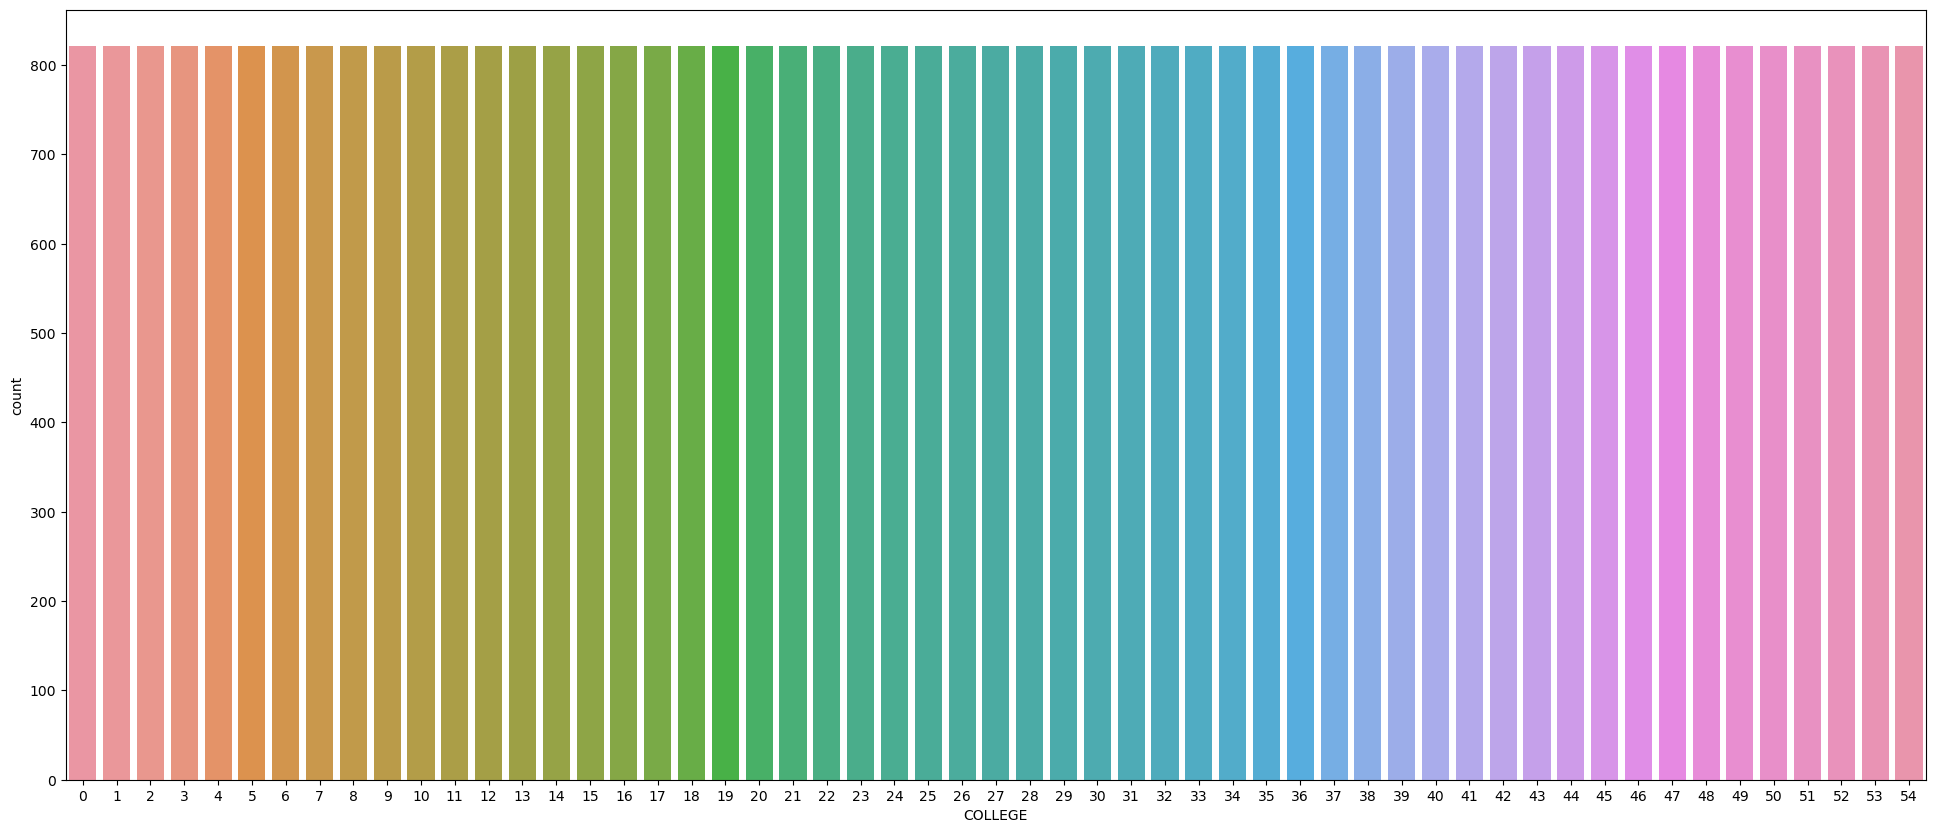

In [36]:
plt.figure(figsize=(24,10))
sns.countplot(data=df_updated,x="COLLEGE")

In [37]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(df_updated.drop(["COLLEGE"],axis=1),df_updated["COLLEGE"],test_size=0.2,random_state=231)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_p=rfc.predict(X_test)
print(accuracy_score(y_p,y_test)*100)
print(confusion_matrix(y_p,y_test))
print(classification_report(y_p,y_test))

89.77964787952608
[[134   0   0 ...   0   0   0]
 [  0 167   1 ...   0   0   1]
 [  1   0 185 ...   0   0   1]
 ...
 [  0   0   0 ... 158   0   0]
 [  0   0   0 ...   0 151   0]
 [  1   2   1 ...   0   0 154]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       144
           1       0.93      0.91      0.92       183
           2       0.96      0.96      0.96       193
           3       0.85      0.81      0.83       163
           4       0.88      0.93      0.90       163
           5       0.79      0.85      0.82       159
           6       0.99      0.96      0.98       175
           7       0.79      0.86      0.82       141
           8       1.00      0.97      0.99       176
           9       1.00      0.97      0.98       192
          10       0.90      0.83      0.87       174
          11       0.87      0.74      0.80       205
          12       0.89      0.93      0.91       159
          13       0.95      0.96

In [39]:
y_test

38279    40
872       9
23606    11
21370     7
43901    52
         ..
34829    32
31381    25
38266    40
23149    10
27982    19
Name: COLLEGE, Length: 9031, dtype: int64

In [40]:
y_p

array([40,  9, 11, ..., 40, 10, 19])

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split=2)
dt.fit(X_train,y_train)
y_p=dt.predict(X_test)
print(accuracy_score(y_p,y_test))
print(classification_report(y_p,y_test))

0.9038866127782084
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       143
           1       0.94      0.94      0.94       178
           2       0.96      0.97      0.97       191
           3       0.90      0.81      0.85       171
           4       0.87      0.96      0.92       157
           5       0.81      0.84      0.82       165
           6       0.99      0.98      0.99       172
           7       0.81      0.84      0.82       148
           8       1.00      0.99      0.99       173
           9       1.00      0.98      0.99       190
          10       0.88      0.81      0.84       175
          11       0.93      0.74      0.82       217
          12       0.93      0.95      0.94       164
          13       0.95      0.96      0.96       169
          14       0.99      0.97      0.98       167
          15       1.00      0.97      0.99       158
          16       0.99      0.98      0.98       196
        

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_p=knn.predict(X_test)
print(accuracy_score(y_p,y_test))
print(classification_report(y_p,y_test))

0.8905990477245045
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       135
           1       0.93      0.99      0.96       169
           2       0.95      0.98      0.97       185
           3       0.85      0.85      0.85       155
           4       0.87      1.00      0.93       151
           5       0.80      0.77      0.79       178
           6       0.99      0.96      0.98       175
           7       0.78      0.85      0.81       142
           8       1.00      0.98      0.99       175
           9       1.00      0.95      0.98       195
          10       0.84      0.80      0.82       168
          11       0.75      0.71      0.73       183
          12       0.90      0.90      0.90       167
          13       0.98      0.98      0.98       170
          14       0.99      0.98      0.98       167
          15       0.99      0.94      0.97       161
          16       0.99      0.99      0.99       195
        

In [43]:
df_updated.shape

(45155, 15)

In [44]:
df.shape

(17694, 15)